In [1]:
import pandas as pd
import numpy as np
import string
from pathlib import Path
from tg.projects.retell.retell_utils.corpora_sugar import CorpusSugar
from tg.projects.retell.retell_utils.metrics import get_cosine_sim, get_jaccard_index,show_statistics_and_bar, plot_confint
from tg.grammar_ru.corpus import CorpusReader
import tg.projects.retell.retell_utils.statistical as stat_utils

In [2]:
retell_corpus = CorpusReader(Path("../../featurized_corpuses/eng/Martin.featurized.retell.corpus.zip"))
text_corpus = CorpusReader(Path("../../featurized_corpuses/books/eng/Martin.featurized.books.corpus.zip"))

In [3]:
book_name = 'A Storm of Swords'
corpus_sugar = CorpusSugar(text_corpus, retell_corpus)
#books, retell_books, summar_books = corpus_sugar.get_books_retell_info_by_author('Martin')
books, retell_books = [corpus_sugar.get_book_by_name(book_name,corpus_type,'Martin') for corpus_type in ['book','retell']]

FileNotFoundError: [Errno 2] No such file or directory: '../../featurized_corpuses/eng/Martin.featurized.retell.corpus.zip'

In [4]:
ban_words = set(string.punctuation + "«—»…")
ban_words.update(["!!", "!?", "?!", "??", "?.."])

In [5]:
stat_extract_retell = stat_utils.get_extract_retell_by_common_word(books,corpus_sugar.get_sentences_with_stem_form,ban_words=ban_words,retell_detail=5)

  0%|          | 0/82 [00:00<?, ?it/s]

In [6]:
true_retell = corpus_sugar.get_true_retell('Martin',"retell",retell_detail=5,book_name=book_name)

In [7]:
jaccard_sim = np.array([get_jaccard_index(stat_extract_retell[i],true_retell[i]) for i in range(len(true_retell))])
cos_sim = np.array([get_cosine_sim(stat_extract_retell[i],true_retell[i]) for i in range(len(true_retell))])

median Индекс Жаккара: 0.143
max Индекс Жаккара: 0.224
min Индекс Жаккара: 0.061
------------------------------------
median Косинусное расстояние: 0.48
max Косинусное расстояние: 0.714
min Косинусное расстояние: 0.135
------------------------------------


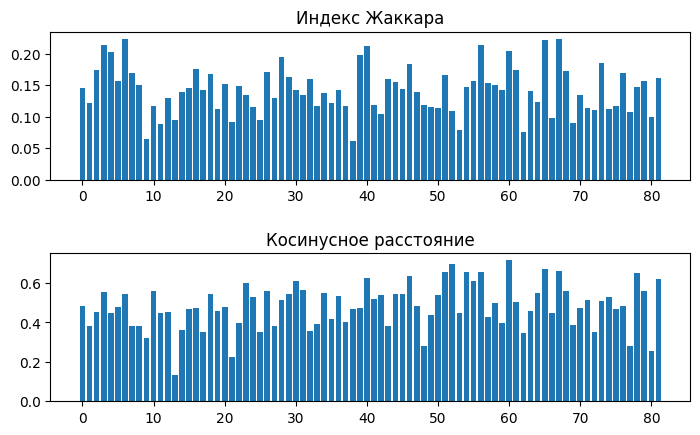

In [8]:
show_statistics_and_bar(jaccard_sim,cos_sim)

  0%|          | 0/1000 [00:00<?, ?it/s]

/home/mixailkys/PycharmProjects/grammar_ru/tg/common/ml/miscellaneous/kraken.py:184: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output = output.append(pd_result)
/home/mixailkys/PycharmProjects/grammar_ru/tg/common/ml/miscellaneous/kraken.py:184: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output = output.append(pd_result)
/home/mixailkys/PycharmProjects/grammar_ru/tg/common/ml/miscellaneous/kraken.py:184: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output = output.append(pd_result)
/home/mixailkys/PycharmProjects/grammar_ru/tg/common/ml/miscellaneous/kraken.py:184: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output = output.ap

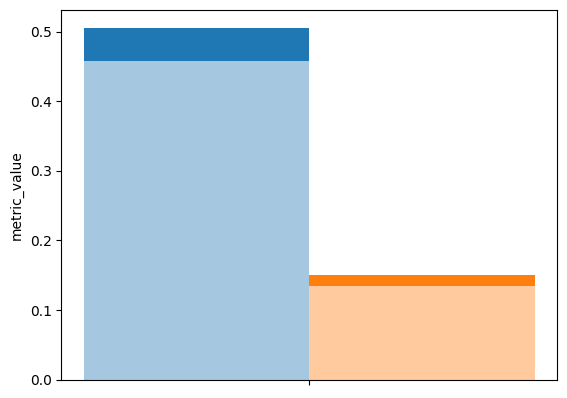

In [9]:
plot_confint(jaccard_sim,cos_sim)